# Histogram – Bimodal Distribution

Shape of X: (90000, 45)
Shape of y: (90000,)
X - Mean: 0.49985307 Std: 0.5050254 Min: -0.60333264 Max: 1.6606818
y - Mean: 0.4998888888888889 Std: 0.4999999876543208 Min: 0 Max: 1


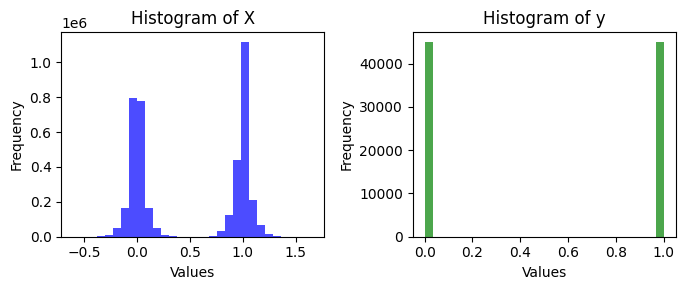

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
X = np.load('Datasets/kryptonite-45-X.npy')
y = np.load('Datasets/kryptonite-45-y.npy')

# Check dimensions
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Basic EDA: Display some stats
print("X - Mean:", np.mean(X), "Std:", np.std(X), "Min:", np.min(X), "Max:", np.max(X))
print("y - Mean:", np.mean(y), "Std:", np.std(y), "Min:", np.min(y), "Max:", np.max(y))

# Visualise histograms for X and y
plt.figure(figsize=(7, 3))

# Histogram for X
plt.subplot(1, 2, 1)
plt.hist(X.flatten(), bins=30, alpha=0.7, color='blue')
plt.title('Histogram of X')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Histogram for y
plt.subplot(1, 2, 2)
plt.hist(y, bins=30, alpha=0.7, color='green')
plt.title('Histogram of y')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Dimension 1 - Mean: 0.50, Std: 0.51, Min: -0.51, Max: 1.39
Dimension 2 - Mean: 0.50, Std: 0.51, Min: -0.43, Max: 1.52
Dimension 3 - Mean: 0.50, Std: 0.50, Min: -0.46, Max: 1.59
Dimension 4 - Mean: 0.50, Std: 0.50, Min: -0.52, Max: 1.66
Dimension 5 - Mean: 0.50, Std: 0.51, Min: -0.52, Max: 1.59
Dimension 6 - Mean: 0.50, Std: 0.50, Min: -0.02, Max: 1.02
Dimension 7 - Mean: 0.50, Std: 0.50, Min: -0.02, Max: 1.02
Dimension 8 - Mean: 0.50, Std: 0.50, Min: -0.02, Max: 1.02
Dimension 9 - Mean: 0.50, Std: 0.51, Min: -0.41, Max: 1.39
Dimension 10 - Mean: 0.50, Std: 0.50, Min: -0.02, Max: 1.02
Dimension 11 - Mean: 0.50, Std: 0.51, Min: -0.42, Max: 1.40
Dimension 12 - Mean: 0.50, Std: 0.51, Min: -0.43, Max: 1.39
Dimension 13 - Mean: 0.50, Std: 0.50, Min: -0.47, Max: 1.55
Dimension 14 - Mean: 0.50, Std: 0.51, Min: -0.41, Max: 1.44
Dimension 15 - Mean: 0.50, Std: 0.50, Min: -0.50, Max: 1.57
Dimension 16 - Mean: 0.50, Std: 0.51, Min: -0.49, Max: 1.50
Dimension 17 - Mean: 0.50, Std: 0.51, Min: -0.43,

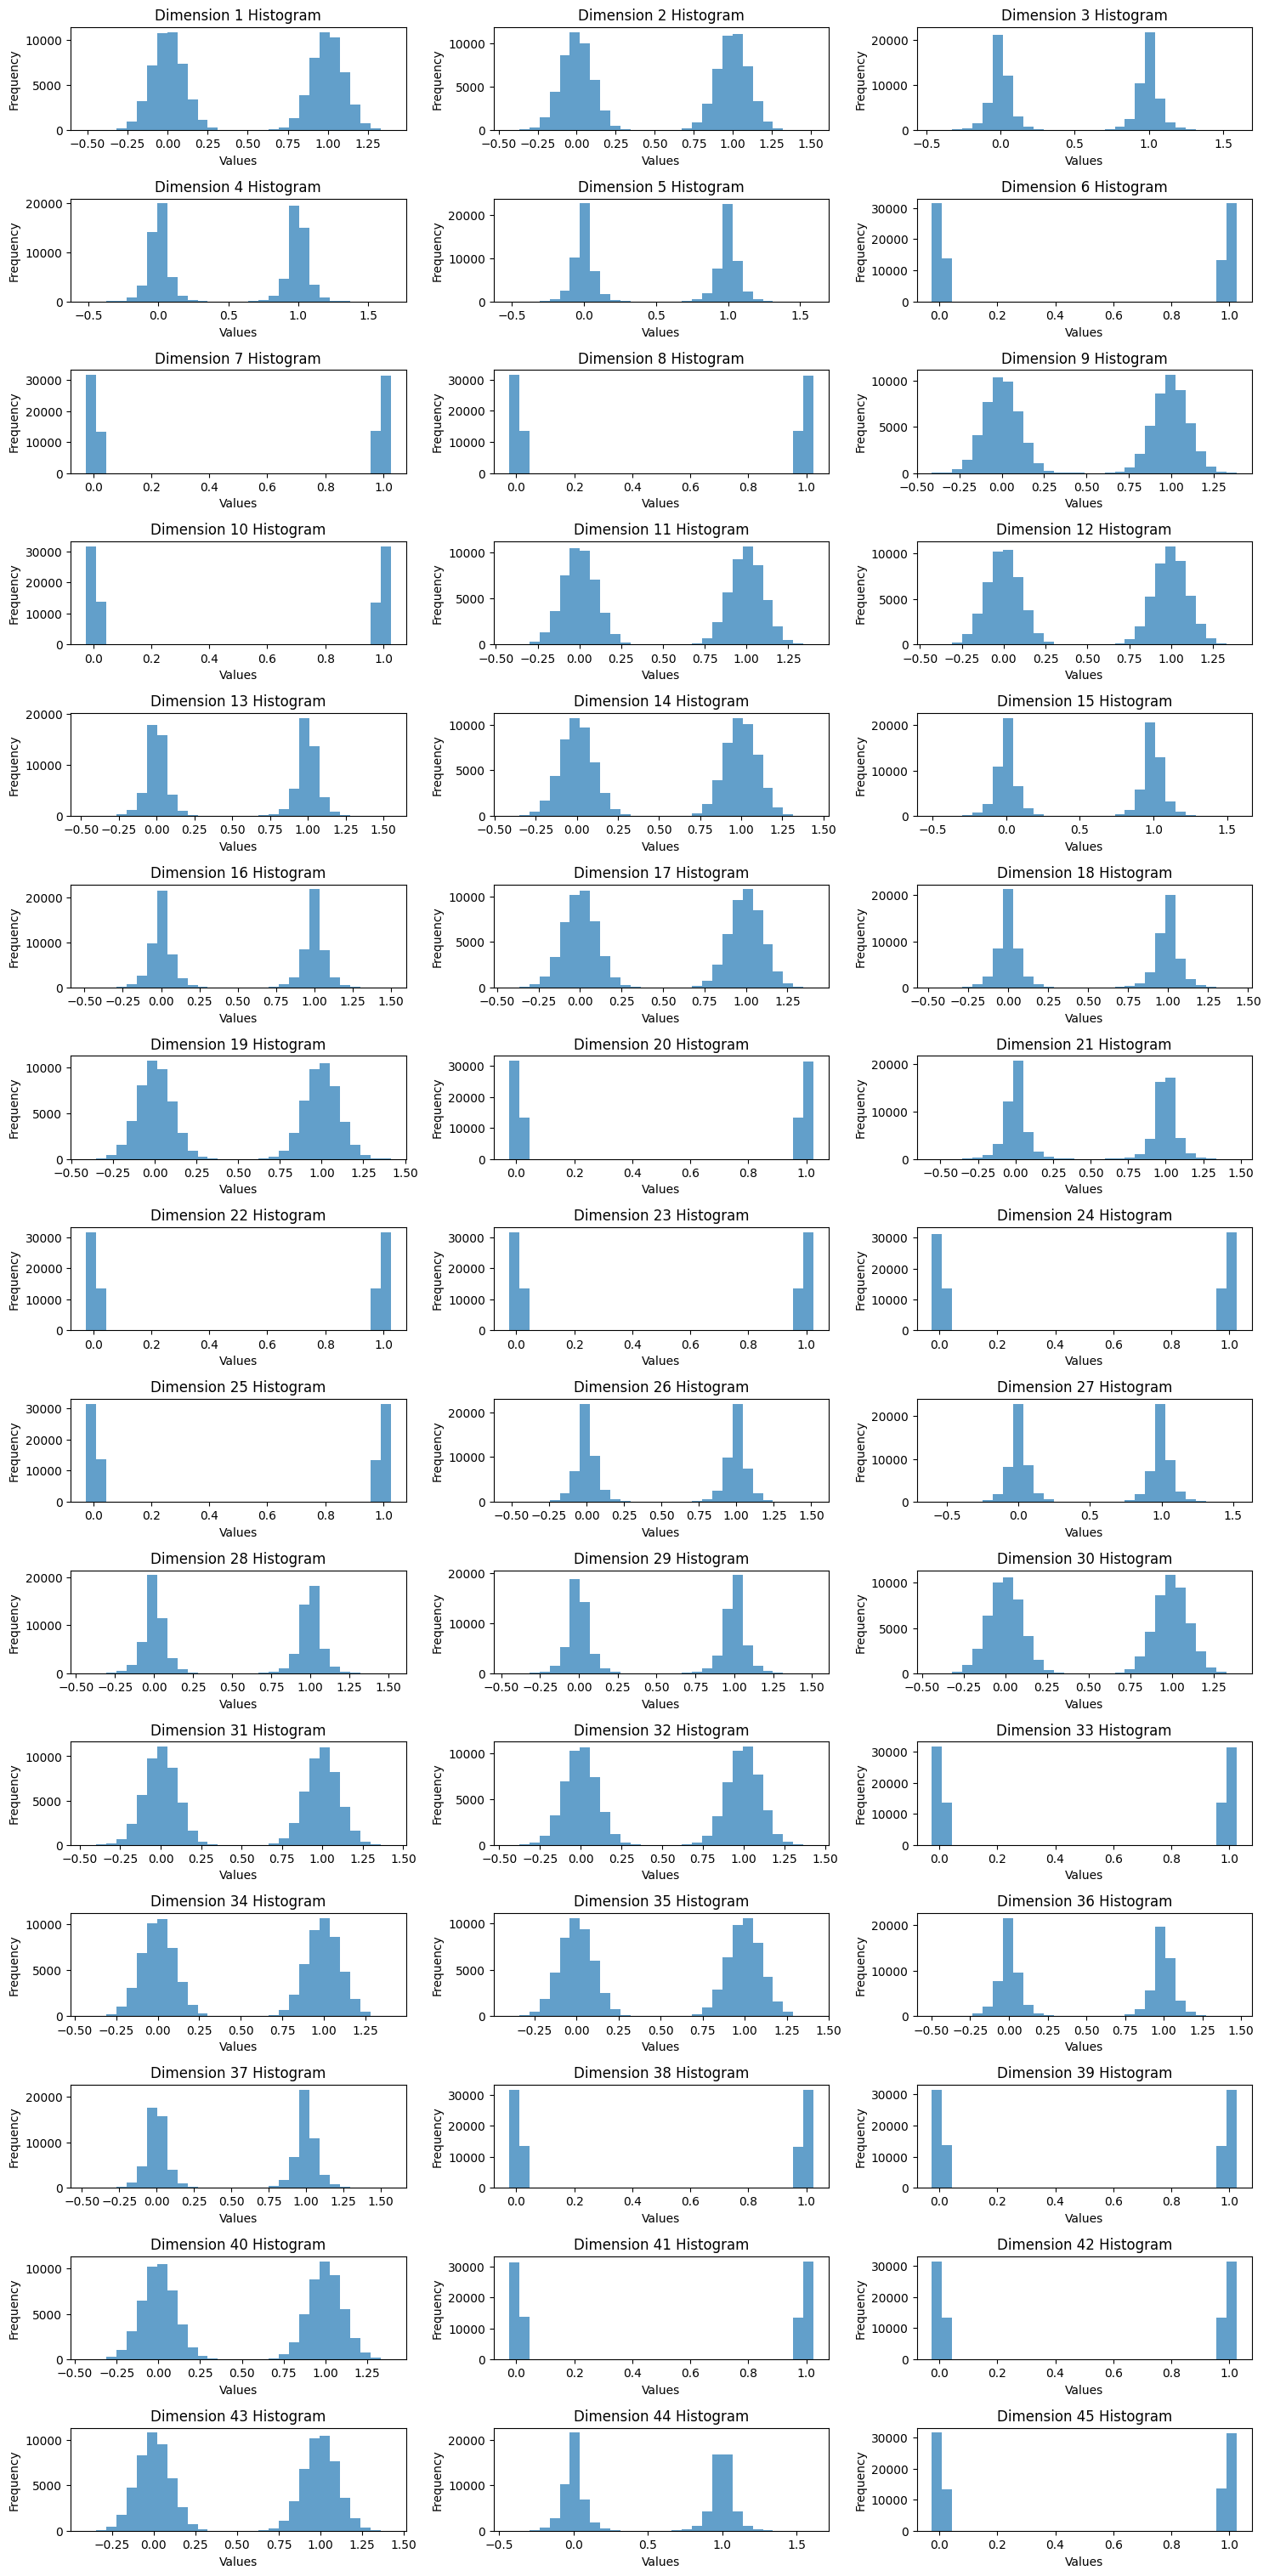

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate and display basic stats for each dimension
for i in range(X.shape[1]):
    print(f"Dimension {i+1} - Mean: {np.mean(X[:, i]):.2f}, Std: {np.std(X[:, i]):.2f}, Min: {np.min(X[:, i]):.2f}, Max: {np.max(X[:, i]):.2f}")

# Plot histograms for each dimension
rows = X.shape[1] // 3 + 1
plt.figure(figsize=(15, 2*rows))
for i in range(X.shape[1]):
    plt.subplot(rows, 3, i + 1)
    plt.hist(X[:, i], bins=30, alpha=0.7)
    plt.title(f'Dimension {i+1} Histogram')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Scatter Plots and Mutual Information

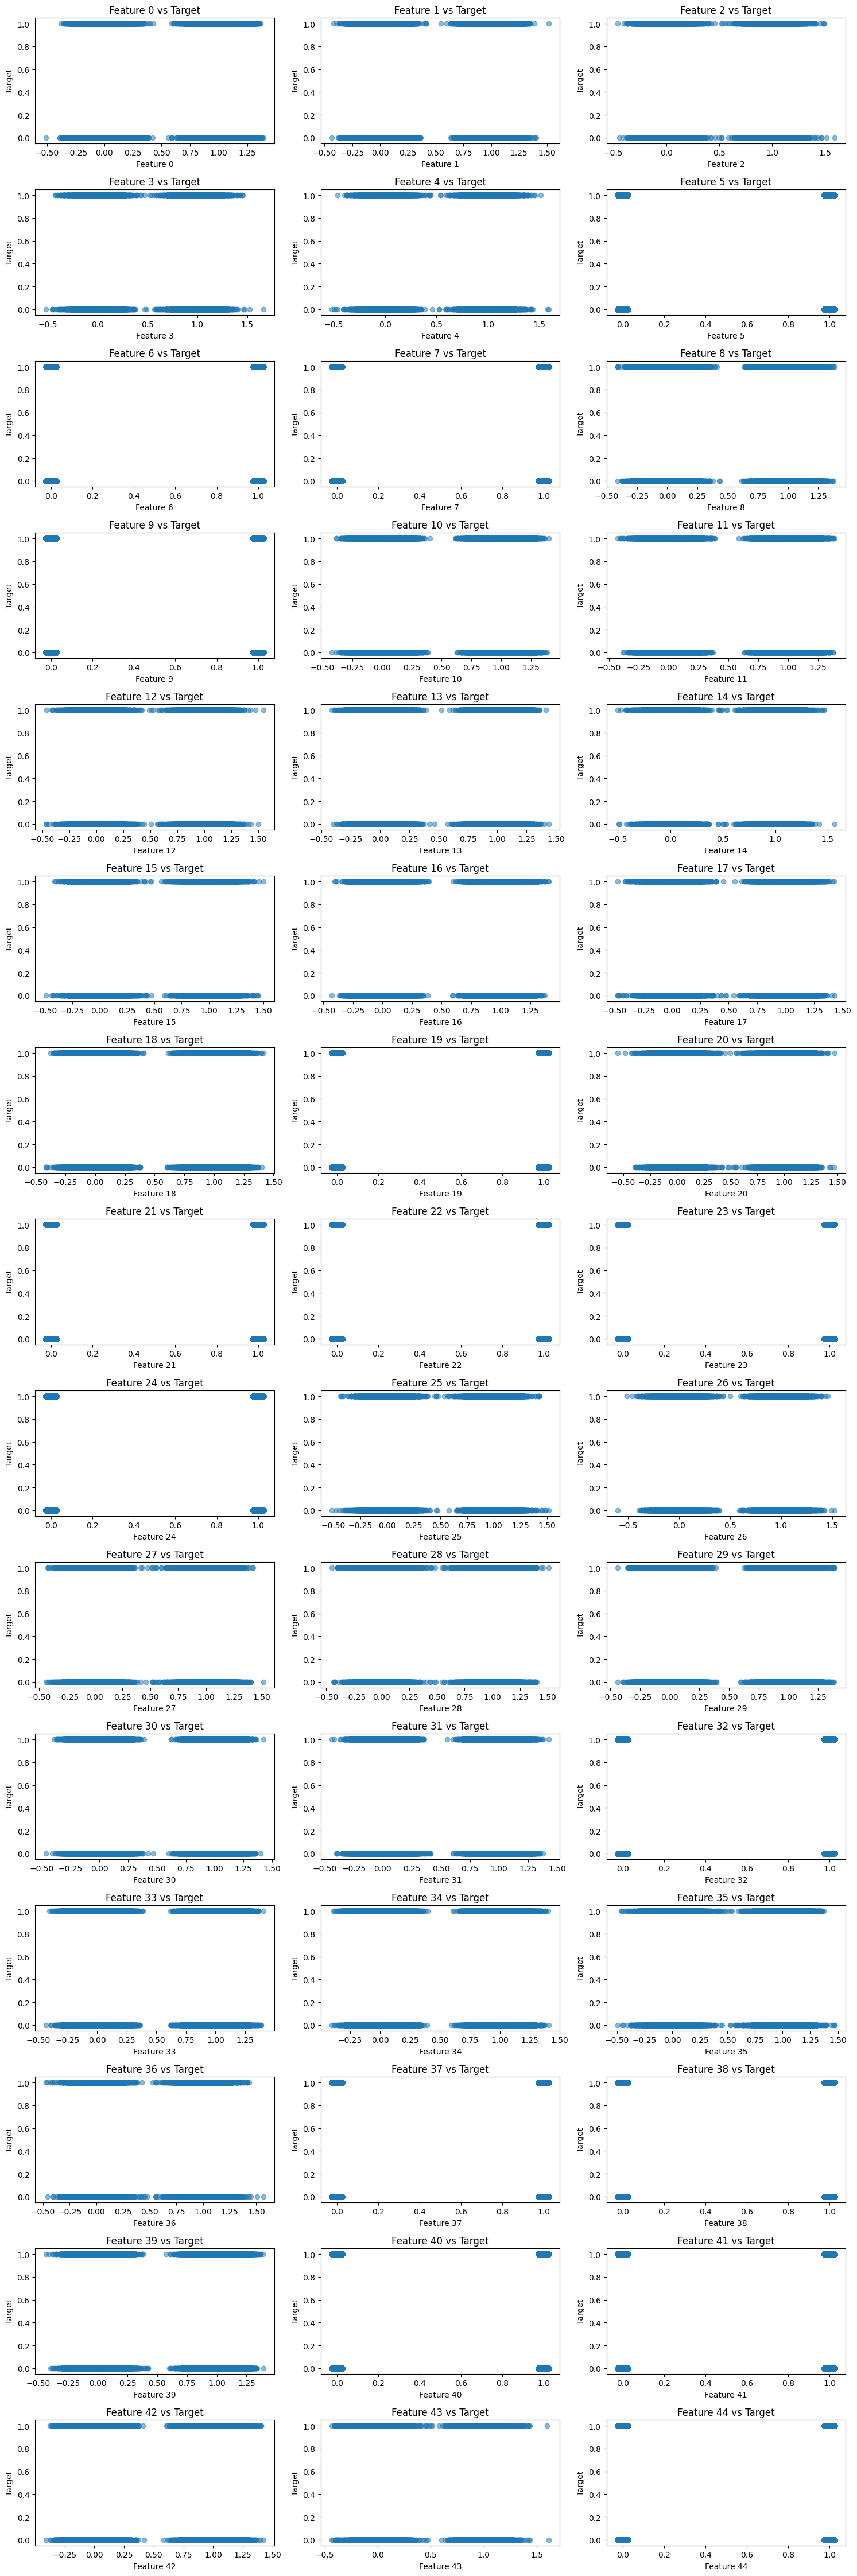

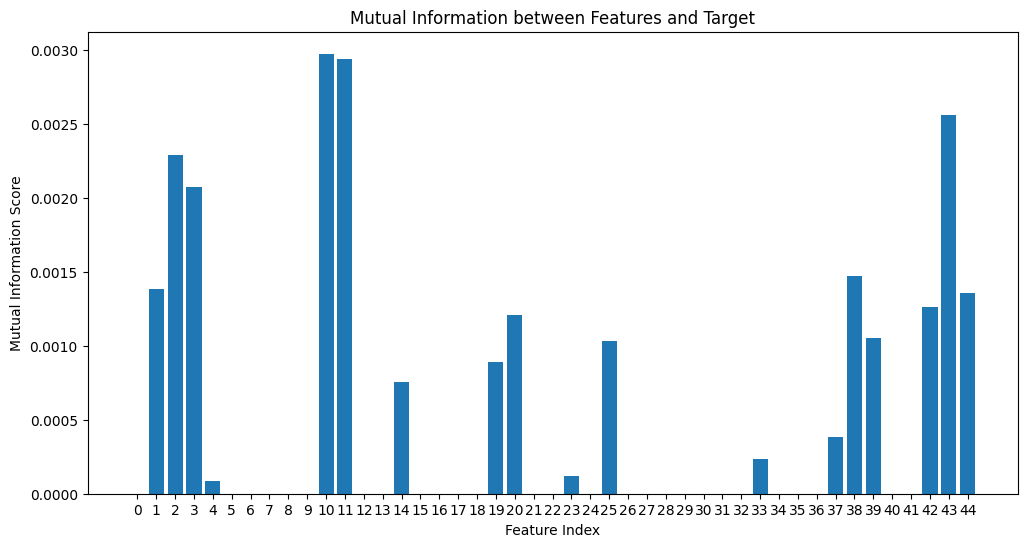

In [6]:
import numpy as np
import matplotlib.pyplot as plt


X = np.load('Datasets/kryptonite-45-X.npy')
y = np.load('Datasets/kryptonite-45-y.npy')


# Assuming X and y are loaded and n_features is the number of features in X
n_features = X.shape[1]
n_columns = 3
n_rows = (n_features + n_columns - 1) // n_columns  # Calculate the number of rows needed

plt.figure(figsize=(15, n_rows * 3))  # Adjust the figure size as needed

for i in range(n_features):
    plt.subplot(n_rows, n_columns, i + 1)
    plt.scatter(X[:, i], y, alpha=0.5)
    plt.title(f'Feature {i} vs Target')
    plt.xlabel(f'Feature {i}')
    plt.ylabel('Target')

plt.tight_layout()
plt.show()

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y, discrete_features='auto')

plt.figure(figsize=(12, 6))
plt.bar(range(n_features), mi_scores)
plt.xlabel('Feature Index')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information between Features and Target')
plt.xticks(range(n_features))
plt.show()



# UMAP
### Failed to separate, output y is very sensitive to inputs

/Users/timothychung/opt/anaconda3/envs/ml2/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


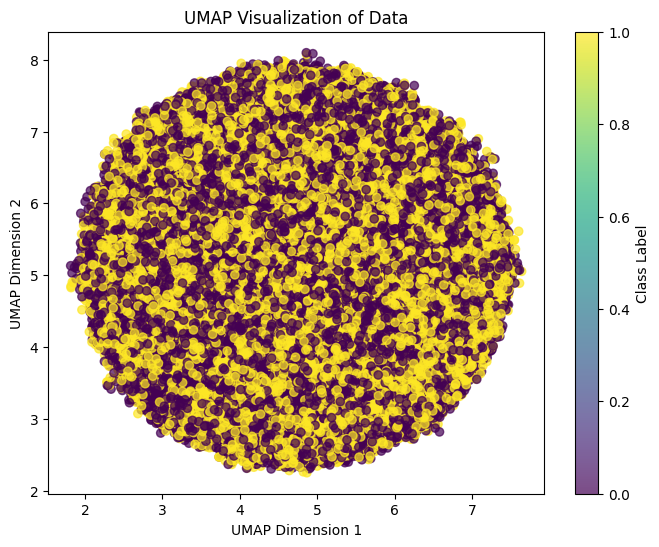

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler

# Load data
X = np.load('Datasets/kryptonite-45-X.npy')
y = np.load('Datasets/kryptonite-45-y.npy')

# Standardize the data (important for UMAP and t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and run UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Class Label')
plt.title('UMAP Visualization of Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


In [ ]:
# ! pip install tf_fourier_features

# MLP with Fourier Features

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, AveragePooling1D
import matplotlib.pyplot as plt
import tensorflow as tf
from tf_fourier_features import FourierFeatureProjection
from tf_fourier_features import FourierFeatureMLP



# Load data
X = np.load('Datasets/kryptonite-24-X.npy')
y = np.load('Datasets/kryptonite-24-y.npy')
X = np.round(X)

# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network with Fourier feature projection and dense layers for binary classification

ip = tf.keras.layers.Input(shape=[X.shape[1]])
# https://arxiv.org/pdf/2006.10739
x = FourierFeatureProjection(gaussian_projection=10, gaussian_scale=0.5)(ip)
# x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = tf.keras.Model(inputs=ip, outputs=output)

# Reshape X to add a channel dimension
X = X.reshape((X.shape[0], X.shape[1], 1))

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Training set: (33600, 24) (33600,)
Validation set: (7200, 24) (7200,)
Test set: (7200, 24) (7200,)
Epoch 1/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5007 - loss: 1.0739 - val_accuracy: 0.4981 - val_loss: 0.7848
Epoch 2/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5024 - loss: 1.0157 - val_accuracy: 0.4958 - val_loss: 0.7692
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4994 - loss: 0.9658 - val_accuracy: 0.4976 - val_loss: 0.7519
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4986 - loss: 0.9264 - val_accuracy: 0.4990 - val_loss: 0.7389
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5006 - loss: 0.8808 - val_accuracy: 0.4978 - val_loss: 0.7286
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5018 - loss: 0.8566 - val_accuracy: 0.4954 - val_loss: 0.7217
Epoch 7/30
 767/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4971 - loss: 0.8407

# Fourier Features with Logistic Regression
### works better than Logistic Regression alone for Kryptonite-9. Promising, but not complex enough to perform well like MLP

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.base import BaseEstimator, TransformerMixin

# Load data
X = np.load('Datasets/kryptonite-9-X.npy')
y = np.load('Datasets/kryptonite-9-y.npy')

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define Fourier Feature Transformer
class FourierFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, gaussian_projection=128, gaussian_scale=0.5):
        self.gaussian_projection = gaussian_projection
        self.gaussian_scale = gaussian_scale

    def fit(self, X, y=None):
        input_dim = X.shape[1]
        if self.gaussian_projection <= 0:
            self.B = np.eye(input_dim)
        else:
            self.B = np.random.normal(
                loc=0.0,
                scale=self.gaussian_scale,
                size=(input_dim, self.gaussian_projection)
            )
        return self

    def transform(self, X):
        x_proj = 2.0 * np.pi * X @ self.B
        x_proj_sin = np.sin(x_proj)
        x_proj_cos = np.cos(x_proj)
        return np.concatenate([x_proj_sin, x_proj_cos], axis=1)

# Logistic Regression without Fourier Features
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression without Fourier Features Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Logistic Regression with Fourier Features
fft = FourierFeatureTransformer(gaussian_projection=900, gaussian_scale=0.5)
fft.fit(X_train)

X_train_fft = fft.transform(X_train)
X_test_fft = fft.transform(X_test)

lr_fft = LogisticRegression(max_iter=10000)
lr_fft.fit(X_train_fft, y_train)
y_pred_fft = lr_fft.predict(X_test_fft)
accuracy_fft = accuracy_score(y_test, y_pred_fft)
print(f"Logistic Regression with Fourier Features Test Accuracy: {accuracy_fft:.4f}")
print(classification_report(y_test, y_pred_fft))


Training set: (12600, 9) (12600,)
Validation set: (2700, 9) (2700,)
Test set: (2700, 9) (2700,)
Logistic Regression without Fourier Features Test Accuracy: 0.5141
              precision    recall  f1-score   support

           0       0.51      0.42      0.46      1345
           1       0.51      0.61      0.56      1355

    accuracy                           0.51      2700
   macro avg       0.51      0.51      0.51      2700
weighted avg       0.51      0.51      0.51      2700

Logistic Regression with Fourier Features Test Accuracy: 0.8863
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1345
           1       0.89      0.88      0.89      1355

    accuracy                           0.89      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.89      0.89      0.89      2700



In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, AveragePooling1D
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tf_fourier_features import FourierFeatureProjection
# from tf_fourier_features import FourierFeatureMLP



# # Load data
# X = np.load('Datasets/kryptonite-9-X.npy')
# y = np.load('Datasets/kryptonite-9-y.npy')

# # Split into train, validation, and test sets (70-15-15 split)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# print("Training set:", X_train.shape, y_train.shape)
# print("Validation set:", X_val.shape, y_val.shape)
# print("Test set:", X_test.shape, y_test.shape)

# # Define a neural network with Fourier feature projection and dense layers for binary classification

# ip = tf.keras.layers.Input(shape=[X.shape[1]])
# x = FourierFeatureProjection(gaussian_projection=45, gaussian_scale=10)(ip)
# x = tf.keras.layers.Dense(2048, activation='relu')(x)
# x = tf.keras.layers.Dense(1024, activation='relu')(x)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dense(256, activation='relu')(x)
# x = tf.keras.layers.Dense(128, activation='relu')(x)
# x = tf.keras.layers.Dense(32, activation='relu')(x)
# x = tf.keras.layers.Dense(16, activation='relu')(x)
# output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

# model = tf.keras.Model(inputs=ip, outputs=output)

# # Reshape X to add a channel dimension
# X = X.reshape((X.shape[0], X.shape[1], 1))

# # Compile the model with binary cross-entropy loss and accuracy metric
# model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# from tensorflow.keras.callbacks import EarlyStopping

# # Define early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model with early stopping
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=30,
#     batch_size=32,
#     verbose=1,
#     callbacks=[early_stopping]
# )

# # Plot the loss curves for training and validation
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # Evaluate the model on the test set for loss and accuracy
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
# print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
